In [836]:
## Chapter 13

## A learning task

The displayed line through the origin classifies the points in the plane, with the light blue above and the light red below.

In particular, it classifies the displayed purple dots.

Task: *using only* the displayed purple dots and knowledge of how they are classified by the displayed line, *compute* a second line through the origin which 

1. classifies the purple dots the same (or approximately the same) as the displayed line, 

2. has high probability of succeeding on other dots

In this case, high probability means that the area between the two lines should be small.

In [837]:
import math 
import numpy as np
import pandas as pd
from scipy.stats import binom, norm
from scipy.integrate import quad
import matplotlib
import matplotlib.pyplot as plt   
import metakernel
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets    
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
import seaborn as sns
sns.set_palette('pastel')
pastel_palette = sns.color_palette('pastel')
import random

In [838]:
def sign(x):
    return 1 if x > 0 else -1

In [839]:
# generate linearlly separate target data

m1 = random.choice([-.25, .25])*np.random.rand(1)
m2 = random.choice([-.25,.25])*np.random.rand(1)
b = 0

# number of data points

n = 100

# generate training data 

def f(x1, x2):
    return m1*x1 + m2*x2+ b

data_x1 = np.random.uniform(-.5, .5, n)
data_x2 = np.random.uniform(-.5, .5, n)
data_0 = list(zip(data_x1, data_x2))
data_1 = [(x1, x2, sign(f(x1, x2))) for x1, x2 in data_0]


In [840]:
# define update function 

def update(w, data):
    misclassifed = [x for x in data if x[2] != sign(w[0]*x[0]+w[1]*x[1])]
    if len(misclassifed) == 0:
        return w, np.array([0, 0])
    else:
        x1, x2, y = random.choice(misclassifed)
        return w+y*np.array([x1, x2]), np.array([x1, x2])



# Define the number of iterations
l = 150

# Create a list to store all stages of w
w_stages = [[.25,-.25]]
w_points = [[0,0]]

# Run the update function over and over again
for _ in range(l):
    w, p = update(w_stages[-1], data_1)
    w_stages.append(list(w))  # Append the current stage of w to w_stages
    w_points.append(list(p))  # Append the current stage of w to w_stages 

print(w_stages)
print(w_points)   


[[0.25, -0.25], [0.24011676867980125, -0.1092348743516558], [0.2145399371092066, 0.14108345049799664], [0.05236467673757306, 0.382273675754101], [0.3708441456952175, -0.0006936166718609638], [0.33815030263734447, 0.2747085605169145], [0.506984960707734, 0.0367584222999916], [0.16695802441385765, 0.5354806678387454], [0.6310770223566248, 0.35021536761656125], [0.2910500860627484, 0.848937613155315], [0.5153402024290694, 0.6999392502829852], [0.9264532732331399, 0.38835350019498693], [0.793836703788811, 0.6355770997006809], [0.9924610957146905, 0.37187352916992655], [0.6524341594208142, 0.8705957747086803], [1.0580793147237393, 0.4449674212999164], [0.7180523784298629, 0.9436896668386702], [0.9747389608104328, 0.7171602693788492], [1.1435736188808223, 0.47921013116192634], [0.9781879259613148, 0.7890370985167078], [1.1470225840317043, 0.5510869602997849], [0.8985691430084325, 0.9531021271544129], [1.3007693302106647, 0.5633017546128882], [1.1353836372911572, 0.8731287219676697], [1.32809

## The perceptron algorithm

### Formatting the data

Since we know the purple points and the way that they are classified by the displayed line, we can view the data as organized as $(x_1, y_1, \pm 1), \ldots, (x_n, y_n, \pm 1)$, where $+1$ indicates that it was above the displayed line, and $-1$ indicates that it was below the displayed line.

### Formatting lines

Lines through the origin can be represented as pairs $(w_0, w_1)$ that determine the line 

$$\{(x,y): w_0\cdot x + w_1\cdot y=0\}$$

By setting $m=-\frac{w_0}{w_1}\cdot x$ one can put this in the more familiar format $y=mx$.

### The update procedure

We view ourselves as constructing lines $(w_0(t), w_1(t))$ as a variable of the time $t=0, 1, 2, \ldots$. 

At $t=0$, we choose an arbitrary line (we choose $w_0(t)=\frac{1}{4}$ and $w_1(t)=-\frac{1}{4}$). 

At stage $t$, if we have correctly classified all the data, then we do nothing. 

But at stage $t+1$, if we have incorrectly classified a point as $\mp 1$ where we should have put $\pm 1$, we choose such a point $(x(t), y(t))$, and we shift to 

$$w_0(t+1) = w_0(t)\pm x(t)$$

$$w_1(t+1) = w_1(t)\pm y(t)$$



In [842]:
def visual_perceptron(j, last_points = False):

    x = np.linspace(-.5, .5, 100)
    y = np.linspace(-.5, .5, 100)
    target = (1/m2)*(-m1*x - b)
    output = (1/w_stages[j][1])*(-w_stages[j][0]*x)

    # Create a plot
    plt.xlim(-.5, .5)
    plt.ylim(-.5,.5)
    plt.fill_between(x, target, 1, alpha=0.25, color = pastel_palette[0])
    plt.fill_between(x, target, -1, alpha=0.25, color = pastel_palette[1])

    xdata_0, ydata_0 = zip(*data_0)

    plt.plot(x, output, color = pastel_palette[2])

    plt.scatter(xdata_0, ydata_0, color = pastel_palette[4], s=10)

    if last_points:
        plt.scatter(w_points[j+1][0], w_points[j+1][1], color = pastel_palette[3], s=100)
            

    plt.show()


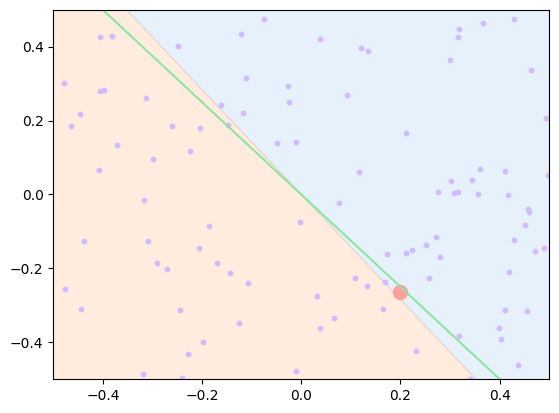

In [843]:
visual_perceptron(12, last_points=True)   


In [844]:
interact(visual_perceptron, j=IntSlider(min=0, max=l-1, step=1, value=0), last_points=True)

interactive(children=(IntSlider(value=0, description='j', max=149), Checkbox(value=True, description='last_poi…

<function __main__.visual_perceptron(j, last_points=False)>